In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [314]:
filename = r'C:\Users\sg911\Desktop\1_MRes Year\1.6_Business\espxlx.xlsx'
df = pd.read_excel(filename, sheet_names='Results')
df

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number
0,1,Semiconductor laser,CAPASSO FEDERICO [US] \nCHO ALFRED YI [US] \nF...,AT & T CORP [US],EP0757418A1,1994-04-04,H01S3/18 \nH01S5/30 \nH01L21/20 \nH01L33/00 \n...,B82Y20/00 (EP) \nH01S5/34 (EP) \nH01S5/3402 (E...,1997-02-05,NaN,24026549
1,2,Article comprising a semiconductor waveguide s...,CAPASSO FREDERICO [US] \nCHO ALFRED YI [US] \n...,AT & T CORP [US],EP0744801A1,1995-05-22,H01S3/18 \nG02B6/10 \nH01S5/30 \nG02B6/12 \nG0...,B82Y20/00 (EP) \nG02B6/122 (EP) \nG02B6/1228 (...,1996-11-27,NaN,23770330
2,3,Light emitting devices based on interband tran...,YANG RUI Q [US],UNIV HOUSTON [US],US5588015A,1995-08-22,H01S3/19 \nH01S5/34 \nH01S5/343,B82Y20/00 (EP) \nH01S5/34 (EP) \nH01S5/3402 (E...,1996-12-24,NaN,24062563
3,4,PRODUCT HAVING QUANTUM CASCADE LASER,CAPASSO FEDERICO \nCARLO SIRTORI \nCHO ALFRED ...,LUCENT TECHNOLOGIES INC,JPH104242A,1996-03-20,H01S3/18 \nH01S5/00 \nH01S5/34,B82Y20/00 (EP) \nH01S5/3402 (EP),1998-01-06,NaN,24479542
4,5,Quantum-dot cascade laser,STAFFORD CHARLES A [CH] \nWINGREEN NED SCOTT [US],NEC RESEARCH INST INC [US],US5692003A,1996-03-29,H01S3/19 \nH01S5/00 \nH01S5/34 \nH01S5/42,B82Y20/00 (EP) \nH01S5/3412 (EP) \nH01S5/3402 ...,1997-11-25,NaN,24504294
5,6,"Interband quantum well cascade laser, with a b...",MEYER JERRY [US] \nVURGAFTMAN IGOR [US] \nYANG...,US ARMY [US],US5799026A,1996-11-01,H01S3/19 \nH01S5/34,B82Y20/00 (EP) \nH01S5/34 (EP) \nH01S5/3422 (E...,1998-08-25,NaN,24988758
6,7,Quantum cascade laser,CAPASSO FEDERICO [US] \nCHO ALFRED YI [US] \nF...,LUCENT TECHNOLOGIES INC [US],EP0841731A1,1996-11-06,H01S3/18 \nH01S5/00 \nH01S5/34 \nH01S5/343,B82Y20/00 (EP) \nH01S5/3402 (EP) \nH01S5/34306...,1998-05-13,NaN,27114293
7,8,Article comprising a unipolar superlattice laser,CAPASSO FEDERICO [US] \nCHO ALFRED YI [US] \nF...,LUCENT TECHNOLOGIES INC [US],US5745516A,1996-11-06,H01S3/19 \nH01S5/34 \nH01S5/343,B82Y20/00 (EP) \nH01S5/3402 (EP) \nH01S5/34306...,1998-04-28,NaN,24992174
8,9,Unipolar multiple-wavelength laser,BERGER VINCENT [FR],THOMSON CSF [FR],US6091751A,1997-03-04,H01S3/19 \nG01N21/59 \nH01S5/00 \nH01S5/34 \nH...,B82Y20/00 (EP) \nH01S5/3402 (EP) \nH01S5/1096 ...,2000-07-18,NaN,9504385
9,10,INFRARED RADIATION SOURCE,KLIPSTEIN PHILIP CHARLES [GB],ISIS INNOVATION [GB] \nKLIPSTEIN PHILIP CHARLE...,WO9840916A1,1997-03-11,H01L33/00 \nH01S3/19 \nH01L33/00 \nH01L33/30 \...,B82Y20/00 (EP) \nH01L33/0025 (EP) \nH01L33/30 ...,1998-09-17,NaN,10809026


In [3]:
df.Applicants.value_counts()

SUMITOMO ELECTRIC INDUSTRIES [JP]                                                                                                                                                                                  20
LUCENT TECHNOLOGIES INC [US]                                                                                                                                                                                       13
SUMITOMO ELECTRIC INDUSTRIES                                                                                                                                                                                       12
DAYLIGHT SOLUTIONS INC [US]                                                                                                                                                                                         9
HAMAMATSU PHOTONICS KK                                                                                                                          

In [328]:
a = df.Inventors.unique()
b = []
for i in range(len(a)):
    b.append(str(a[i]).split( ))

import itertools
flat=itertools.chain.from_iterable(b)
c = pd.DataFrame(flat, columns=['zer'])
#c.zer.value_counts()

In [329]:
applist = df['Applicants'].values.tolist()
applist = [x for x in applist if str(x) != 'nan']

In [330]:
def freq(st):
    t=0
    for i in range(len(applist)):
        if st in applist[i]:
            t=t+1
    print(t)
    return

In [331]:
freq('DAYLIGHT SOLUTIONS')

16


In [332]:
freq('SUMITOMO')

36


In [333]:
freq('LUCENT')

18


In [334]:
freq('HAMAMATSU')

26


In [335]:
freq('CANON')

11


In [336]:
freq('AGILENT')

7


In [337]:
freq('THALES')

9


In [338]:
applist = df['Inventors'].values.tolist()
applist = [x for x in applist if str(x) != 'nan']
freq('CAPASSO')

34


In [339]:
freq('HASHIMOTO')

20


In [340]:
freq('AKIKUSA')

18


In [341]:
freq('EDAMURA')

25


In [342]:
freq('FAIST')

21


In [343]:
applist = df['Publication number'].values.tolist()
applist = [x for x in applist if str(x) != 'nan']
flags = []
for i in range(len(applist)):
    flags.append(applist[i][0:2])
from collections import Counter
dflags = Counter(flags)
dfflags = pd.DataFrame.from_dict(dflags, orient='index')
dfflags = dfflags.rename(columns={0:'count'})
dfflags = dfflags.sort_values(by='count', ascending=False)
dfflags

,count
US,211
WO,44
JP,39
EP,26
CN,24
GB,6
CA,5
DE,4
FR,3
KR,3


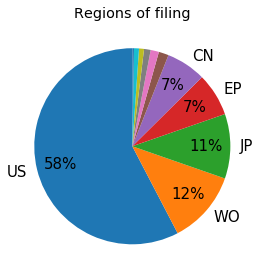

In [345]:
def my_autopct(pct):
    return ('%.0f%%' % pct) if pct > 6 else ''

dfflags.plot(kind='pie', y = 'count', autopct=my_autopct, pctdistance=0.75,
 startangle=90, shadow=False, legend = False, fontsize=15, labels=['US','WO','JP','EP','CN','','','','','','',''])
plt.ylabel('')
plt.title('Regions of filing')
plt.tight_layout()
plt.savefig('regs.png',dpi=600)

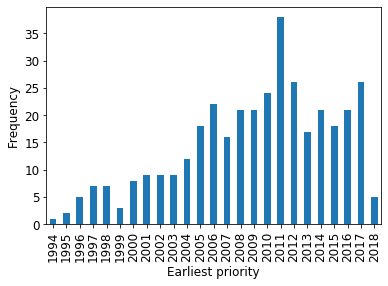

In [346]:
df['Earliest priority'] = df['Earliest priority'].astype("datetime64")

ax1 = df.groupby(df['Earliest priority'].dt.year).count().plot(kind="bar", y='No')
ax1.set_ylabel('Frequency')
ax1.legend().remove()
plt.show(ax1)

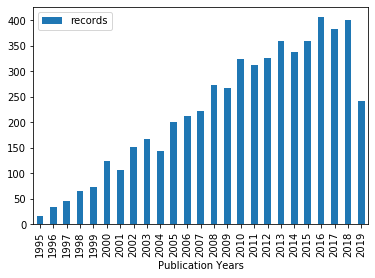

In [268]:
pubs = pd.read_csv(r'C:\Users\sg911\Desktop\1_MRes Year\1.6_Business\pubsanal.txt', delimiter='\t')
pubs = pubs.set_index(['Publication Years']).sort_index()
pubs.plot(kind="bar", y=['records'])

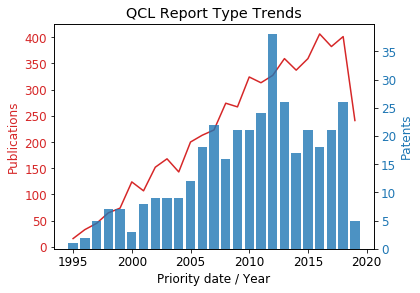

In [327]:
plt.rcParams.update({'font.size': 12})
t = np.linspace(1995,2019,25)
data1 = pubs['records']
data2 = g['No']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Priority date / Year')
ax1.set_ylabel('Publications', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Patents', color=color)  # we already handled the x-label with ax1
ax2.bar(t, data2, color=color, alpha=0.8)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('QCL Report Type Trends')
plt.savefig('time.png',dpi=600, bbox_inches='tight')
plt.show()